<a href="https://colab.research.google.com/github/Alaa-Barazi/CloudProject-Kakadoo/blob/main/Claude_Exe6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }



    try:
        response = requests.get(url, headers=headers)
        print("HTTP status:", response.status_code)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            return soup
        else:
            print("Response head:", response.text[:200])
            return None

    except Exception as e:
        print("Request error:", e)
        return None


In [54]:
import re
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index

In [55]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index

In [56]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index

In [57]:
def search(query, index):
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    if word in index:
      results[word] = index[word]
  return results

In [58]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
     return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results

In [59]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'bird'
results = search_engine(url, query)
print(results)

HTTP status: 200
{'bird': 575}


In [60]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

HTTP status: 200
{}


In [61]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [62]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

HTTP status: 200
{'bird': 575, 'wing': 25}


In [84]:
list_of_words=["Sampling","diagnosis","tissues","antigen","Bacteria","pathogen","PCR ","infected","RPA","plant"]
url = 'https://extension.colostate.edu/resource/molecular-methods-for-diagnosing-plant-diseases/'

my_index={}
stemmer = PorterStemmer()
for word in list_of_words:
  result = search_engine(url, word)
  number = list(result.values())[0]
  my_index[word] = number
print(my_index)


HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
HTTP status: 200
{'Sampling': 35, 'diagnosis': 7, 'tissues': 10, 'antigen': 4, 'Bacteria': 1, 'pathogen': 48, 'PCR ': 14, 'infected': 1, 'RPA': 11, 'plant': 22}


In [ ]:
#Firebase
!pip install firebase
from firebase import firebase
FBconn = firebase.FirebaseApplication('https://cloudlab6-4efe4-default-rtdb.firebaseio.com/',None)

In [88]:
#Save to DB


data_to_upload = {
    "Index" : my_index
}
res = FBconn.put(
          url=f'myIndex/',
          name='Index',
          data=my_index
      )
print(res)


{'Bacteria': 1, 'PCR ': 14, 'RPA': 11, 'Sampling': 35, 'antigen': 4, 'diagnosis': 7, 'infected': 1, 'pathogen': 48, 'plant': 22, 'tissues': 10}


{'Bacteria': 1, 'PCR ': 14, 'RPA': 11, 'Sampling': 35, 'antigen': 4, 'diagnosis': 7, 'infected': 1, 'pathogen': 48, 'plant': 22, 'tissues': 10}


<BarContainer object of 10 artists>

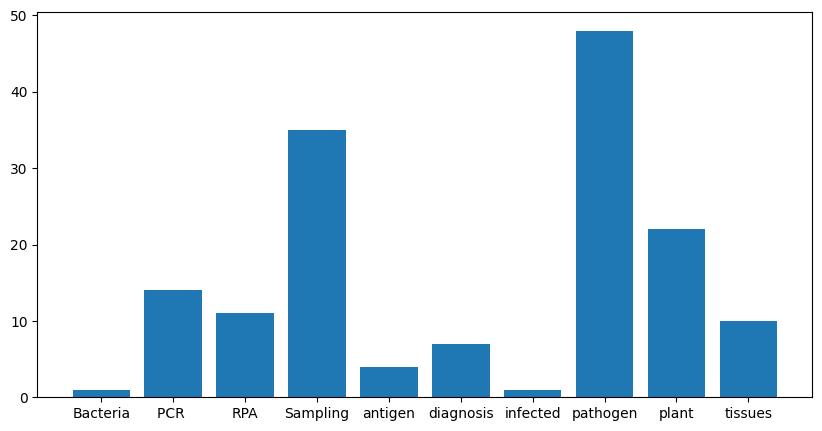

In [96]:
#get data
result = FBconn.get(f"/myIndex/Index",None);
print(result)

#show graph
import matplotlib.pyplot as plt
#increase dimensions so the titles at the bottom can be seen
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(result.keys(), result.values())

In [85]:
url = 'https://repositorio.iica.int/server/api/core/bitstreams/183d8982-bb38-4872-aaff-43b6401fcfa0/content'
query = 'plant iiss'
results = search_engine(url, query)
print(results)

HTTP status: 200
{'plant': 1}


In [ ]:
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
   rank = rank*1/count
rank = 1-rank
print(rank)

In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'collage students'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'owls'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)

In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'Industry'
results = search_engine(url, query)
print(results)
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank
print(rank)



```
# This is formatted as code
```

### **מנוע המיועד למספר דפים**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from collections import defaultdict
class WikiSearchEngine:
  def __init__(self):
    """Initialize the search engine"""
    self.base_url = "https://en.wikipedia.org/w/api.php"
    self.pages = []
    self.word_locations = defaultdict(list) # word -> [(page_id, frequency), ...]
    self.stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at', 'to', 'for', 'of', 'with'}
    return False
  def fetch_wiki_pages(self, topic, num_pages=5):
    """Fetch Wikipedia pages for given topic"""
    search_params = {
      "action": "query",
      "format": "json",
      "list": "search",
      "srsearch": topic,
      "srlimit": num_pages
    }
    try:
      response = requests.get(self.base_url, params=search_params)
      search_results = response.json()['query']['search']

      for result in search_results:
        content_params = {
            "action": "query",
            "format": "json",
            "prop": "extracts|info",
            "pageids": result['pageid'],
            "inprop": "url",
            "explaintext": True
        }
        content_response = requests.get(self.base_url, params=content_params)
        page_data = content_response.json()['query']['pages'][str(result['pageid'])]
        self.pages.append({
          'id': result['pageid'],
          'title': page_data['title'],
          'url': page_data.get('fullurl', f"https://en.wikipedia.org/?curid={result['pageid']}"),
          'content': page_data['extract']
        })
      print(f"Retrieved: {page_data['title']}")
      return True

    except Exception as e:
      print(f"Error fetching pages: {str(e)}")

  def build_index(self):
        """Build a simple word location index"""
        self.word_locations.clear()

        # Process each page
        for page in self.pages:
            # Get all words from content
            words = re.findall(r'\w+', page['content'].lower())

            # Count word frequencies
            word_counts = defaultdict(int)
            for word in words:
                if word not in self.stop_words:
                    word_counts[word] += 1

            # Add to index with page information
            for word, count in word_counts.items():
                self.word_locations[word].append((page['id'], count))

  def search(self, query, num_results=5):
        """Search pages using simple word frequency ranking.
        Ranks pages based on:1. Number of query words found in the page
        2. Total frequency of query words  """
        # Get query words
        query_words = [word.lower() for word in re.findall(r'\w+', query)
                    if word.lower() not in self.stop_words]
        if not query_words:
            return []

        # Calculate scores for each page
        page_scores = defaultdict(lambda: {'matches': 0, 'total_freq': 0})

        # For each query word
        for word in query_words:
            # Find pages containing this word
            for page_id, freq in self.word_locations.get(word, []):
                page_scores[page_id]['matches'] += 1
                page_scores[page_id]['total_freq'] += freq


        # Convert to list and sort
        ranked_results = [
            (page_id, scores['matches'], scores['total_freq'])
            for page_id, scores in page_scores.items()
        ]
        # Sort by number of matching words first, then by total frequency
        ranked_results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        # Format results
        results = []
        for page_id, matches, total_freq in ranked_results[:num_results]:
            page = next(p for p in self.pages if p['id'] == page_id)
            # Find the first matching word context
            context = self.get_context(page['content'], query_words)
            results.append({
                'title': page['title'],
                'url': page['url'],
                'matching_words': matches,
                'total_frequency': total_freq,
                'context': context
            })
        return results


In [ ]:
def fetch_wiki_pages(self, topic, num_pages=5):
  """Fetch Wikipedia pages for given topic"""
  search_params = {
  "action": "query",
  "format": "json",
  "list": "search",
  "srsearch": topic,
  "srlimit": num_pages
  }
  try:
      response = requests.get(self.base_url, params=search_params)
      search_results = response.json()['query']['search']

      for result in search_results:
        content_params = {
            "action": "query",
            "format": "json",
            "prop": "extracts|info",
            "pageids": result['pageid'],
            "inprop": "url",
            "explaintext": True
        }
        content_response = requests.get(self.base_url, params=content_params)
        page_data = content_response.json()['query']['pages'][str(result['pageid'])]
        self.pages.append({
          'id': result['pageid'],
          'title': page_data['title'],
          'url': page_data.get('fullurl', f"https://en.wikipedia.org/?curid={result['pageid']}"),
          'content': page_data['extract']
        })
        print(f"Retrieved: {page_data['title']}")
      return True

  except Exception as e:
    print(f"Error fetching pages: {str(e)}")


In [ ]:
    def build_index(self):
        """Build a simple word location index"""
        self.word_locations.clear()

        # Process each page
        for page in self.pages:
            # Get all words from content
            words = re.findall(r'\w+', page['content'].lower())

            # Count word frequencies
            word_counts = defaultdict(int)
            for word in words:
                if word not in self.stop_words:
                    word_counts[word] += 1

            # Add to index with page information
            for word, count in word_counts.items():
                self.word_locations[word].append((page['id'], count))

    def search(self, query, num_results=5):
        """Search pages using simple word frequency ranking.
        Ranks pages based on:1. Number of query words found in the page
        2. Total frequency of query words  """
        # Get query words
        query_words = [word.lower() for word in re.findall(r'\w+', query)
                      if word.lower() not in self.stop_words]
        if not query_words:
            return []

        # Calculate scores for each page
        page_scores = defaultdict(lambda: {'matches': 0, 'total_freq': 0})

        # For each query word
        for word in query_words:
            # Find pages containing this word
            for page_id, freq in self.word_locations.get(word, []):
                page_scores[page_id]['matches'] += 1
                page_scores[page_id]['total_freq'] += freq


        # Convert to list and sort
        ranked_results = [
            (page_id, scores['matches'], scores['total_freq'])
            for page_id, scores in page_scores.items()
        ]
        # Sort by number of matching words first, then by total frequency
        ranked_results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        # Format results
        results = []
        for page_id, matches, total_freq in ranked_results[:num_results]:
            page = next(p for p in self.pages if p['id'] == page_id)
            # Find the first matching word context
            context = self.get_context(page['content'], query_words)
            results.append({
                'title': page['title'],
                'url': page['url'],
                'matching_words': matches,
                'total_frequency': total_freq,
                'context': context
            })
        return results